# Capstone Project - To Predict the Severity of an Accident (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we are try **to predicts the severity of an accident when and Where it happens .**


As a nation on wheels, driving around is part of the life. Imagine You are driving to another city for work or to visit friends. It is rainy and windy and on the way, you come across the terrible traffic jam on the other side of the highway. Long lines of cars are barely moving. As you keep driving police car start appearing from afar shutting down the highway. Its an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to happening. 
  
Now wouldn't be great if there is something in place that could warn you given the weather and road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully or even you change your travel if you are able to. 

This report will be targeted to **United Stated accidents (2016-2020)**.

## Data <a name="data"></a>


To consider the problem we have the data as below:

Most of the accidents features state, city, place, weather condition and POI data found in this Kaggle dataset. Please find the link [ https://www.kaggle.com/sobhanmoosavi/us-accidents](http://)

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.  

This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to June 2020 for the Contiguous United States. 

Due to limitation of my computational space I am specifically focusing accidents in the state **Florida,USA and try to predict the accident for the same**.

#### <b>Acknowledgements</b> <br>

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.


In [88]:
# import the libraries
import numpy as np 
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns


### Due to limitation of computational space, we will focus on the following state: FL -Florida

Created a list to store the state, here I have included the state Florida-FL.Since it is alist we can add multiple states in it.

In [89]:
state_lst=['FL']


Let's read the data from data source and check the attribite State, whether it contains the state Florida.And it provides the information of column names

In [90]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_June20.csv")
df = df[df.State.isin(state_lst)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258002 entries, 116060 to 3513297
Data columns (total 49 columns):
ID                       258002 non-null object
Source                   258002 non-null object
TMC                      194898 non-null float64
Severity                 258002 non-null int64
Start_Time               258002 non-null object
End_Time                 258002 non-null object
Start_Lat                258002 non-null float64
Start_Lng                258002 non-null float64
End_Lat                  63104 non-null float64
End_Lng                  63104 non-null float64
Distance(mi)             258002 non-null float64
Description              258002 non-null object
Number                   84357 non-null float64
Street                   258002 non-null object
Side                     258002 non-null object
City                     257974 non-null object
County                   258002 non-null object
State                    258002 non-null object
Zipcode         

#### It contains the 49 columns. Now, Explore few rows to get a sense of data

In [91]:
df.shape

(258002, 49)

The state FLORIDA records 258002 accidents from 2016-2020

In [92]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,194898.000000,258002.000000,258002.000000,258002.000000,63104.000000,63104.000000,258002.000000,84357.000000,254318.000000,83120.000000,253860.000000,256012.000000,255185.000000,234796.000000,100736.000000
mean,212.440779,2.369714,27.727011,-81.547734,27.541915,-81.327438,0.354069,7448.984080,75.368729,74.809456,73.089947,30.041882,9.425516,8.646847,0.022363
std,28.590830,0.570552,1.489125,1.335645,1.452176,1.202250,1.821340,22811.238318,10.453554,11.980622,17.433400,0.143049,1.802577,5.166560,0.104436
min,200.000000,1.000000,24.555269,-87.516281,24.570110,-87.618730,0.000000,1.000000,-16.100000,-26.200000,8.000000,0.120000,0.000000,0.000000,0.000000
25%,201.000000,2.000000,26.211676,-82.363519,26.082145,-82.184833,0.000000,1550.000000,70.000000,70.000000,61.000000,29.960000,10.000000,5.800000,0.000000
50%,201.000000,2.000000,27.940029,-81.462540,27.820960,-81.371840,0.000000,4308.000000,77.000000,77.000000,74.000000,30.040000,10.000000,8.100000,0.000000
75%,201.000000,3.000000,28.549030,-80.321520,28.515078,-80.229930,0.010000,9001.000000,82.400000,82.000000,88.000000,30.120000,10.000000,11.500000,0.000000
max,406.000000,4.000000,30.997141,-80.038630,30.977330,-80.037800,90.370003,961052.000000,158.000000,102.000000,100.000000,30.890000,72.000000,984.000000,9.980000


In [93]:
# Check and explore the data for the selected state
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
116060,A-116062,MapQuest,222.0,3,2016-11-30 15:36:03,2016-11-30 17:09:22,27.981367,-82.326561,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
116061,A-116063,MapQuest,222.0,3,2016-11-30 16:25:35,2016-11-30 17:12:25,27.981367,-82.326561,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
116062,A-116064,MapQuest,201.0,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
116063,A-116065,MapQuest,201.0,3,2016-11-30 16:34:57,2016-11-30 17:04:27,25.899435,-80.346680,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
116064,A-116066,MapQuest,201.0,2,2016-11-30 16:38:41,2016-11-30 17:08:23,26.272926,-80.296432,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


These data came from two sources, *MapQuest and Bing*, both of which report severity level but in a different way. Bing has 4 levels while MapQuest has 5. And according to dataset creator, there is no way to do a 1:1 mapping between them. 

It is hard to choose one and we definitely can't use both. I decided to select **MapQuest** because serious accidents are we really care about and the sparse data of such accidents is the reality we have to confront.

Finally, drop data reported from Bing and 'Source' column.

In [94]:
df = df.loc[df['Source']=="MapQuest",]
df = df.drop(['Source'], axis=1)

### Useless Features 

#### Features 'ID' doesn't provide any useful information about accidents themselves. 'TMC', 'Distance(mi)', 'End_Time' (we have start time), 'Duration', 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. For 'Description', the POI features have already been extracted from it by dataset creators. Let's get rid of these features first.

In [95]:
df = df.drop(['ID','TMC','Description','Distance(mi)', 'End_Time',  
              'End_Lat', 'End_Lng'], axis=1)

#### Check out some categorical features.



In [96]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Side 2
Country 1
Timezone 3
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


Drop 'Country' and 'Turning_Loop' for they have only one class.



In [97]:
df = df.drop(['Country','Turning_Loop'], axis=1)



 ### Clean Up Categorical Features
 
 If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up.

In [98]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['SSW' 'WSW' 'SE' 'SSE' 'SW' 'South' 'ESE' 'Calm' 'North' 'East' 'NW'
 'Variable' 'NNW' 'West' 'WNW' 'NNE' 'NE' 'ENE' 'S' 'VAR' nan 'CALM' 'E'
 'N' 'W']


In [99]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['S' 'W' 'SE' 'SW' 'E' 'CALM' 'N' 'NW' 'VAR' 'NE' nan]


In [100]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)

# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']

df.loc[:,['Weather_Condition'] + weather]



,Weather_Condition,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
116060,Overcast,0,1,0,0,0,0,0
116061,Mostly Cloudy,0,1,0,0,0,0,0
116062,Mostly Cloudy,0,1,0,0,0,0,0
116063,Mostly Cloudy,0,1,0,0,0,0,0
116064,Scattered Clouds,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2478133,Mostly Cloudy,0,1,0,0,0,0,0
2478139,Partly Cloudy,0,1,0,0,0,0,0
2478149,Mostly Cloudy,0,1,0,0,0,0,0
2478165,Mostly Cloudy,0,1,0,0,0,0,0


### Fix Datetime Format

Since the 'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour'.

In [101]:
import datetime
df = df.drop(["Weather_Timestamp"], axis=1)
df['Start_Time']= pd.to_datetime(df['Start_Time'])
df['hour']= df['Start_Time'].dt.hour
df['year']= df['Start_Time'].dt.year
df['month']= df['Start_Time'].dt.month
df['week']= df['Start_Time'].dt.week
df['day']= df['Start_Time'].dt.weekday_name
df['quarter']= df['Start_Time'].dt.quarter
df['time_zone']= df['Start_Time'].dt.tz
df['time']= df['Start_Time'].dt.time

 HANDLING MISSING DATA - Drop Features As seen from below, many columns have missing values.

In [102]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Number,64.964211
7,City,0.013545
10,Zipcode,0.076058
11,Timezone,0.076058
12,Airport_Code,0.076058
13,Temperature(F),1.366966
14,Wind_Chill(F),68.001855
15,Humidity(%),1.553986
16,Pressure(in),0.697027
17,Visibility(mi),1.003344


More than 60% percent of 'Number', 'Wind_Chill(F)', and 'Precipitation(in)' is missing. Drop na and value imputation wouldn't work for these features. 'Number' and 'Wind_Chill(F)' will be dropped because they are not highly related to severity according to previous research, whereas 'Precipitation(in)' could be a useful predictor and hence can be handled by separating feature.

Drop these features:

1. 'Number'
2. 'Wind_Chill(F)'

In [103]:
df = df.drop(['Number','Wind_Chill(F)'], axis=1)



Seperate Feature - Add a new feature for missing values in 'Precipitation(in)' and replace missing values with median.

In [104]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA


The counts of missing values in some features are much smaller compared to the total sample. It is convenient to drop rows with missing values in these columns.

Drop NAs by these features:

'City'
'Zipcode'
'Airport_Code'
'Sunrise_Sunset'
'Civil_Twilight'
'Nautical_Twilight'
'Astronomical_Twilight'

In [105]:
 df = df.dropna(subset=['City','Zipcode','Airport_Code','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

Value Imputation - Most of the rest columns only have small missing part that can be filled. (It is not absolutely necessary though, we can also just drop na)

In [106]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 
Temperature(F) : 17
Humidity(%) : 17
Pressure(in) : 17
Visibility(mi) : 17
Wind_Speed(mph) : 18


In [107]:
df = df.dropna(subset=Weather_data)


Categorical Weather Features- For categorical weather features, majority rather than median will be used to replace missing values.

In [108]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))

# drop na
df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 
Wind_Direction : 130
Clear : 92
Cloud : 81
Rain : 65
Heavy_Rain : 65
Snow : 65
Heavy_Snow : 65
Fog : 81


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on predicting the severity of an accident in Florida, US.

In first step we have collected the required **data: Traffic attributes, weather attributes, POI attributes ** . We have also done the data clean up, dropping nan values and value imputation for missing values.

Second step,in our analysis, we calculate analysis to predict the 'accident severity' across different areas of Florida.

> > > ## Analysis <a name="analysis"></a>

#### The data is so unbalanced that we can hardly do exploratory analysis. To address this issue, the combination of over- and under-sampling will be used since the dataset is large enough. 

we can do some exploratoty analysis on resampled data.

## Time Features

It's quite interesting that the count of other levels accidents is mostly consistent from March to December, whereas the number of level 4 accidents rapidly increased from April to June and remained stable until July then increased again from August.

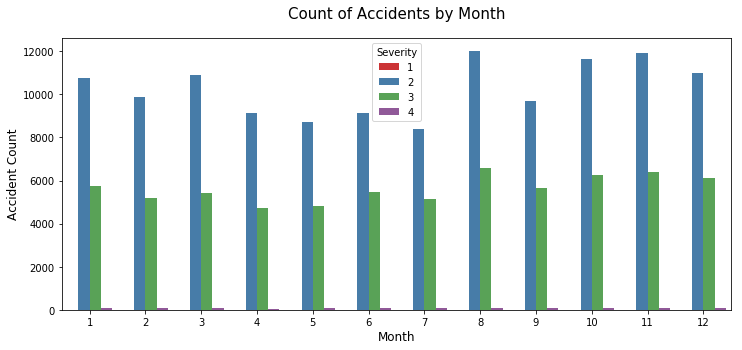

In [109]:
plt.figure(figsize=(12,5))
chart = sns.countplot(x='month', hue='Severity', data=df ,palette="Set1")
plt.title("Count of Accidents by Month", size=15, y=1.05)
plt.xlabel('Month', size=12, labelpad=3)
plt.ylabel('Accident Count', size=12, labelpad=3) 
plt.show()

#### Year

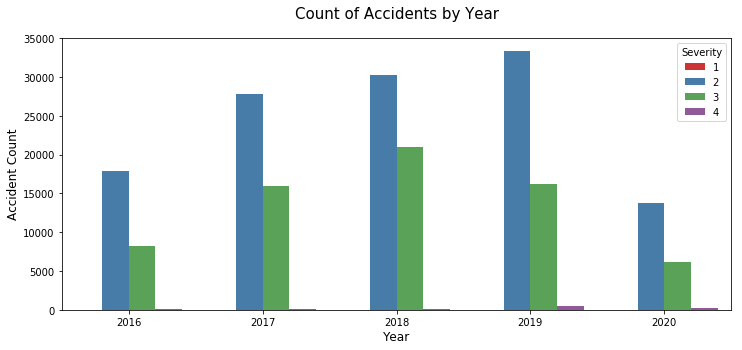

In [110]:
plt.figure(figsize=(12,5))
chart = sns.countplot(x='year', hue='Severity', data=df ,palette="Set1")
plt.title("Count of Accidents by Year", size=15, y=1.05)
plt.xlabel('Year', size=12, labelpad=3)
plt.ylabel('Accident Count', size=12, labelpad=3) 
plt.show()

#### Weekday - The number of accidents was much less on weekends while the proportion of level 4 accidents was higher. Mostly on Tuesday records the highest accident.

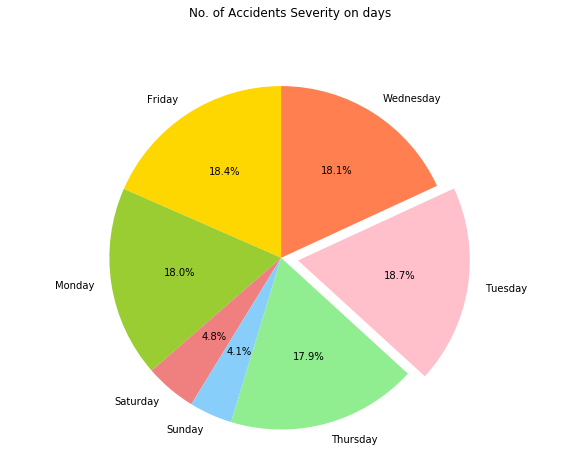

In [111]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','coral']
explode_list = [0, 0, 0, 0, 0, 0.1,0]
df.groupby(['day'])['Severity'].size().plot(kind='pie',
                            figsize=(10, 7),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            colors=colors_list,    
                            explode=explode_list
                            )
plt.axis('equal') 
plt.title('No. of Accidents Severity on days', y=1.12) 
plt.xlabel('', size=12, labelpad=3)
plt.ylabel('', size=12, labelpad=3)
plt.show()

#### Hour-Most accidents happened during the daytime, especially 7 and 8am peak. When it comes to night, accidents were far less but more likely to be serious.

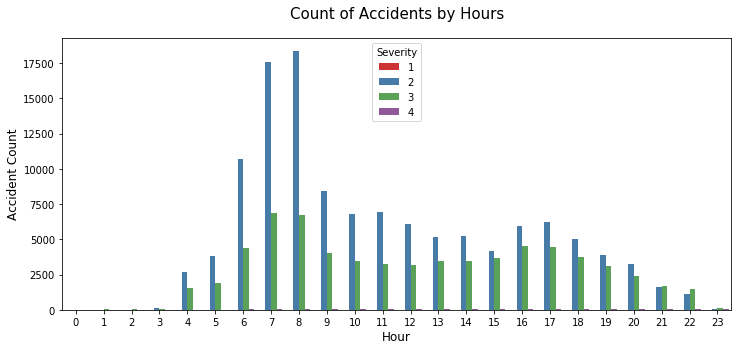

In [112]:
plt.figure(figsize=(12,5))
chart = sns.countplot(x='hour', hue='Severity', data=df ,palette="Set1")
plt.title("Count of Accidents by Hours", size=15, y=1.05)
plt.xlabel('Hour', size=12, labelpad=3)
plt.ylabel('Accident Count', size=12, labelpad=3) 
plt.show()

#### Period-of-Day-Accidents were less during the night but were more likely to be serious.

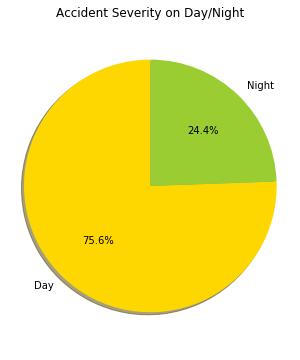

In [113]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df.groupby(['Sunrise_Sunset'])['Severity'].size().sort_values(ascending=False).plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,  
                            colors=colors_list,     
                            
                                                                                    
                                 )
plt.axis('equal') 

# add legend
plt.title('Accident Severity on Day/Night')
plt.xlabel('', size=12, labelpad=3)
plt.ylabel('', size=12, labelpad=3)
plt.show()

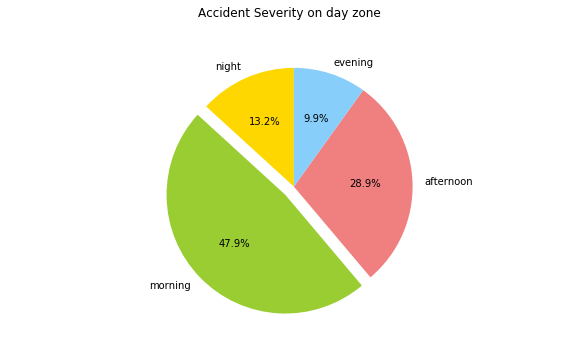

In [114]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode_list = [0, 0.1, 0, 0]

df['day_zone'] = pd.cut((df['hour']),bins=(0,6,12,18,24), labels=["night", "morning", "afternoon", "evening"])
df.groupby(['day_zone'])['Severity'].size().plot(kind='pie',
                            figsize=(10, 5),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            colors=colors_list,    
                             explode=explode_list

                            )
plt.axis('equal') 
plt.title('Accident Severity on day zone', y=1.12) 
plt.xlabel('', size=12, labelpad=3)
plt.ylabel('', size=12, labelpad=3)
plt.show()

### Address Feeatures

#### Side-Right side of the line is much more dangerous than left side.

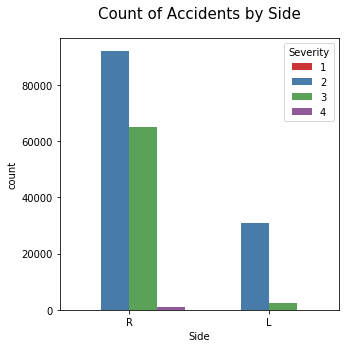

In [115]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity', data=df ,palette="Set1")
plt.title("Count of Accidents by Side", size=15, y=1.05)
plt.show()

#### Latitude and Longitude

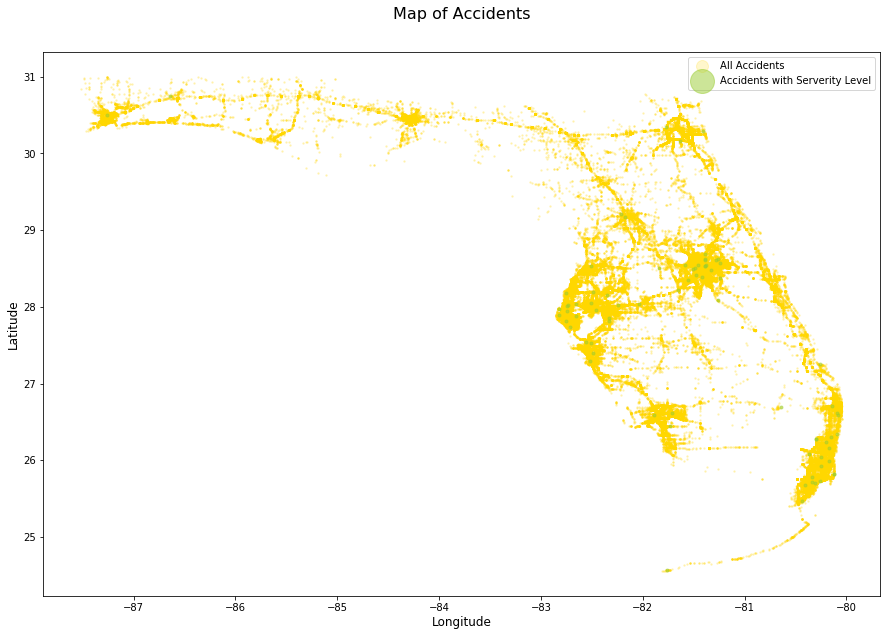

In [116]:
df_4 = df[df['Severity']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="gold", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="yellowgreen", alpha=0.5, label='Accidents with Serverity Level')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

### Weather Features

Maximum number of accident records when the weather condition is CLEAR

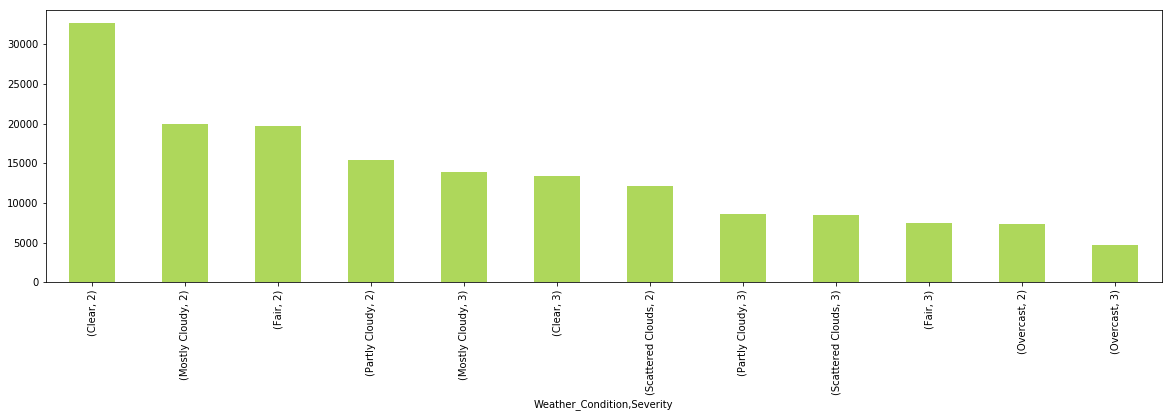

In [117]:
plt.figure(figsize =(20,5))
df.groupby(['Weather_Condition','Severity']).size().sort_values(ascending=False).head(12).plot.bar(color='yellowgreen',alpha=0.8)


#### Visibility

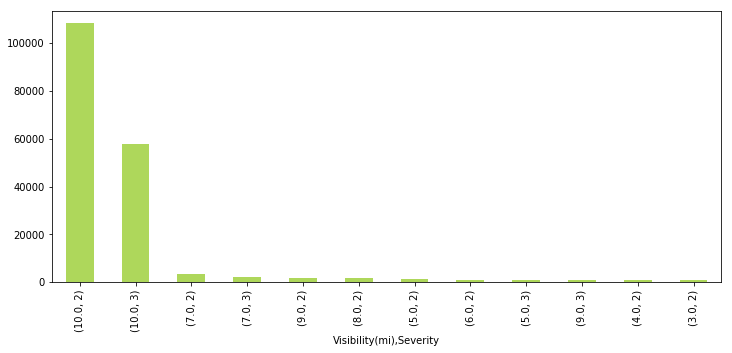

In [118]:
plt.figure(figsize =(12,5))
df.groupby(['Visibility(mi)','Severity']).size().sort_values(ascending=False).head(12).plot.bar(color='yellowgreen',alpha=0.8)

#### Wind Direction

Text(0, 0.5, 'Accident Count')

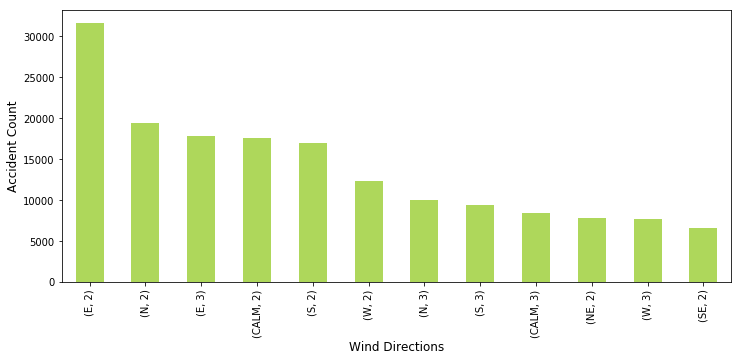

In [119]:
plt.figure(figsize =(12,5))
df.groupby(['Wind_Direction','Severity']).size().sort_values(ascending=False).head(12).plot.bar(color='yellowgreen',alpha=0.8)
plt.xlabel('Wind Directions', size=12, labelpad=3)
plt.ylabel('Accident Count', size=12, labelpad=3)

### POI Features

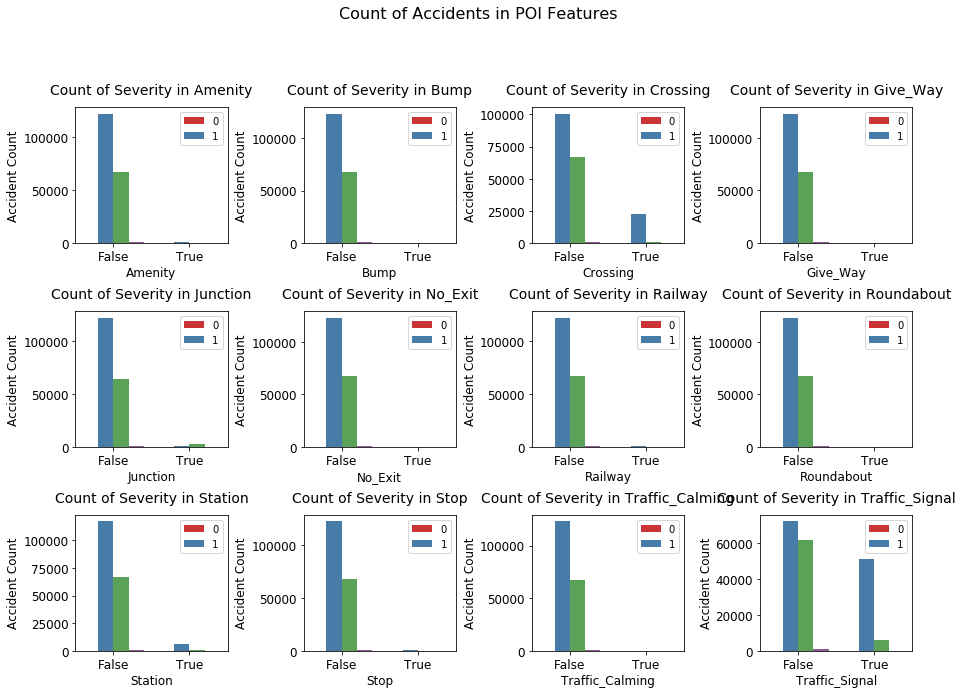

In [120]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity', data=df ,palette="Set1")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features ',y=1.02, fontsize=16)
plt.show()

Drop some categorical feature values

In [121]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','Weather_Condition','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight',
            'Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming','Start_Time','day','time','time_zone','day_zone']
df = df.drop(fre_list, axis  = 1)

### One-hot Encoding
One-hot encode categorical features.

In [122]:
df = df.replace([True, False], [1,0])

cat = ['Side','State','Timezone','Wind_Direction', 'week', 'month', 'hour']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)
df.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
116060,3,27.981367,-82.326561,80.6,70.0,29.94,10.0,5.8,0.0,0,...,0,1,0,0,0,0,0,0,0,0
116061,3,27.981367,-82.326561,80.6,65.0,29.94,10.0,6.9,0.0,0,...,0,0,1,0,0,0,0,0,0,0
116062,2,25.627699,-80.374451,80.1,71.0,29.96,10.0,9.2,0.0,0,...,0,0,1,0,0,0,0,0,0,0
116063,3,25.899435,-80.346680,80.1,69.0,29.97,10.0,11.5,0.0,0,...,0,0,1,0,0,0,0,0,0,0
116064,2,26.272926,-80.296432,79.0,69.0,29.98,10.0,10.4,0.0,0,...,0,0,1,0,0,0,0,0,0,0


## Model

### Train Test Split
Resample data and split it into X and y.

Standardize features based on unit variance.

Split data into X_train, X_test, y_train, and y_test. The size of training data is about 64000 and the test is about 16000.

In [123]:
# split X, y
X = df.drop('Severity', axis=1)
y= df['Severity']
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
from sklearn.model_selection import train_test_split

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Logistic Regression
Logistic regression was emploied as a baseline to perform binary classification task.

In [124]:
# Logistic regression with default setting.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000,random_state=42)
clf.fit(X_train, y_train)

accuracy_train = clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train Accuracy: 73.6%
Test Accuracy: 73.7%


In [125]:
# Calculate the f1 score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score


lr_cal = clf.predict(X_test)

# Calculate the f1 score
f1_lr = f1_score(y_test, lr_cal, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_lr = jaccard_similarity_score(y_test, lr_cal)
print('f1 score: ',f1_lr)
print('Jaccard index: ',jsc_lr)


f1 score:  0.7349162617421267
Jaccard index:  0.7366402254461956


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


Even with the best parameter setting, logistic regression yielded very poor results for both training data and test data.

## Decision Tree
Then, decision tree classifier was employied. The grid search was performed over choices of 'min_samples_split': {5,10, 20, 30, 40}, 'max_features': {None, 'log2', 'sqrt'}

In [126]:
%%time
from sklearn import tree
# Training step, on X_train with y_train
tree_clf = tree.DecisionTreeClassifier(min_samples_split = 5)
tree_clf = tree_clf.fit(X_train,y_train)

tree_accuracy_train = tree_clf.score(X_train, y_train)
print("Train Accuracy: %.1f%%"% (tree_accuracy_train*100))
tree_accuracy_test = tree_clf.score(X_test,y_test)
print("Test Accuracy: %.1f%%"% (tree_accuracy_test*100))

Train Accuracy: 98.2%
Test Accuracy: 88.2%
CPU times: user 6.94 s, sys: 145 ms, total: 7.08 s
Wall time: 6.86 s


By using decision tree classifier, the training accuracy improved to 98.2% and test accuracy to 88.3%. The result is almost perfect.

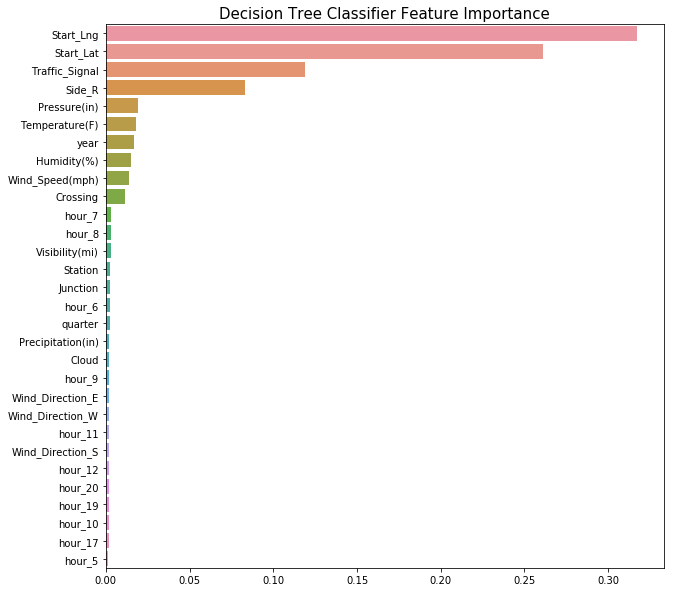

In [127]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], 
                           index=df.drop('Severity',axis=1).columns)

importances.iloc[:,0] = tree_clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Decision Tree Classifier Feature Importance', size=15)

plt.show()

The feature importance plot shows that high-resolution spatio-temporal patterns of accidents are the most useful features to predict severity. Among them, start_lat, traffic signal frequency is far more important than any other feature. In addition to these spatio-temporal features, weather features like pressure, temperature, humidity, and wind speed are also very important.

In [128]:
tree_cal = tree_clf.predict(X_test)

# Calculate the f1 score
f1_tree = f1_score(y_test, tree_cal, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_tree = jaccard_similarity_score(y_test, tree_cal)
print('f1 score: ',f1_tree)
print('Jaccard index: ',jsc_tree)

f1 score:  0.8817421095093914
Jaccard index:  0.8823974532929757


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Random Forest
Finally, random forest classifier was employied. 

In [129]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

CPU times: user 1min 1s, sys: 4.18 ms, total: 1min 1s
Wall time: 1min 1s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
train_pred =  rf_clf.predict(X_train)
test_pred =rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, train_pred)
print("Train Accuracy: %.1f%%"% (rf_train_accuracy*100))
rf_test_accuracy = accuracy_score(y_test, test_pred)
print("Test Accuracy: %.1f%%"% (rf_test_accuracy*100))

Train Accuracy: 99.9%
Test Accuracy: 85.6%


By using random forest classifier, the model achieved 99.9% train accuracy and 85.1% test accuracy, which is even better than the results of decision tree classifier. But it took a much longer time to train.

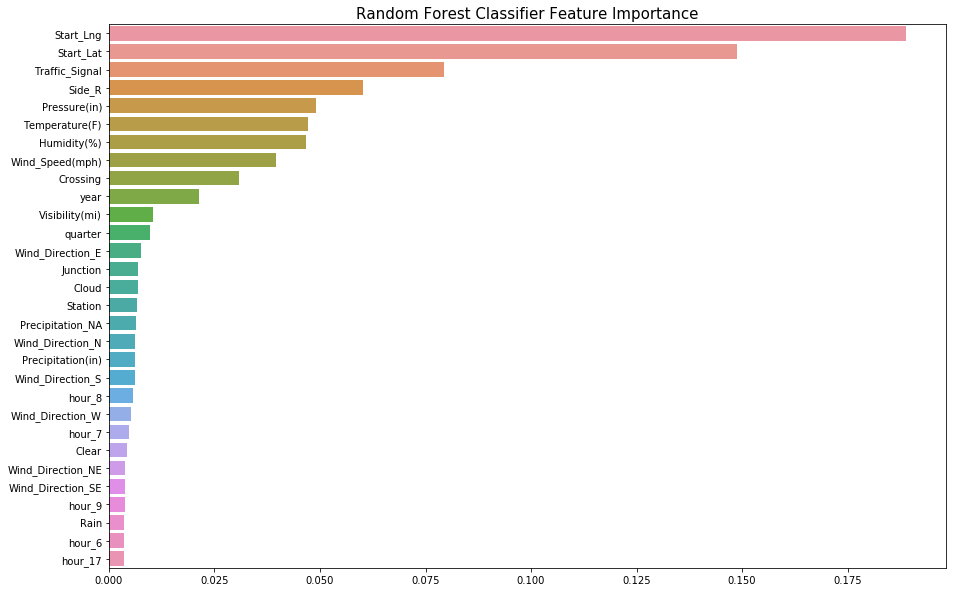

In [131]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=df.drop('Severity',axis=1).columns)

importances.iloc[:,0] = rf_clf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()

The top 15 important features of random forest model are almost as same as decision tree model.

In [132]:
rf_cal = tree_clf.predict(X_test)

# Calculate the f1 score
f1_rf = f1_score(y_test, rf_cal, average='weighted') 

#Calculate the Jaccard index# Predict using the model
jsc_rf= jaccard_similarity_score(y_test, rf_cal)
print('f1 score: ',f1_rf)
print('Jaccard index: ',jsc_rf)

f1 score:  0.8817421095093914
Jaccard index:  0.8823974532929757


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Report

Calculated the F1_score and Jaccard index accuracy for above algorithms. The final report table of 3 algorithm as below,


In [133]:
# Report
train_data=[(accuracy_train*100), (tree_accuracy_train*100), (rf_train_accuracy*100)]
test_data=[(accuracy_test*100), (tree_accuracy_test*100), (rf_test_accuracy*100)]


Jaccard = [jsc_lr,jsc_tree,jsc_rf]
F1_score = [f1_lr,f1_tree,f1_rf]

    
df = {'Algorithm': ['LogisticRegression','Decision Tree','Random Forest'], \
     'Train Data':train_data,'Test Data':test_data,'Jaccard': Jaccard, 'F1-score': F1_score}

Report = pd.DataFrame(data=df, columns=['Algorithm','Train Data', 'Test Data','Jaccard', 'F1-score'], index=None)
Report

,Algorithm,Train Data,Test Data,Jaccard,F1-score
0,LogisticRegression,73.580524,73.664023,0.736640,0.734916
1,Decision Tree,98.170859,88.239745,0.882397,0.881742
2,Random Forest,99.947161,85.619977,0.882397,0.881742


## Results and Discussion <a name="results"></a>

Our analysis shows the greater number of accidents when and where it happens.Country-wide accident severity can be accurately predicted with limited data attributes (location, time, weather, and POI).Time series features are also very important. An accident is more likely to be a serious one when accidents happen less frequently at this time.If an accident happens on Interstate Highway, there is a 2% chance that it will be a serious one, which is about 2.3 times of average and higher than any other street type.An accident is much less likely to be severe if it happens near traffic signal while more likely if near junction.Weather features like pressure, temperature, humidity, and wind speed are also very important.

Result of all this we can predict the severity of an accident based on traffic,weather,address and POI attributes. This, of course, does not imply that how long will take to clear the accidents.Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project is to predict the severity of an accident to drive safely and avoid car accident.Our patterns and study indicates that there are patterns of when, where and under what weather conditions did most accidents occurred. The severity of each accident can be predicted quite accurately with various classification machine learning algorithms.

These models can be very useful in helping drivers for safe drive, with this prediction they can avoid distracted rush hours, signals and routes.